In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('df.csv')
data.head()

,date,consumption,month,day,weekend,holiday
0,2022-10-18,838818.13,October,Tuesday,Weekday,No holiday
1,2022-10-19,834358.85,October,Wednesday,Weekday,No holiday
2,2022-10-20,837491.36,October,Thursday,Weekday,No holiday
3,2022-10-21,826990.28,October,Friday,Weekday,No holiday
4,2022-10-22,792007.99,October,Saturday,Weekend,No holiday


In [3]:
data.describe()

,consumption
count,152.000000
mean,853352.631382
std,58550.689207
min,682213.660000
25%,829563.165000
50%,863833.875000
75%,892007.230000
max,964467.250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         152 non-null    object 
 1   consumption  152 non-null    float64
 2   month        152 non-null    object 
 3   day          152 non-null    object 
 4   weekend      152 non-null    object 
 5   holiday      152 non-null    object 
dtypes: float64(1), object(5)
memory usage: 7.2+ KB


In [5]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
data.index.freq = 'D'
data.head()

,consumption,month,day,weekend,holiday
date,,,,,
2022-10-18,838818.13,October,Tuesday,Weekday,No holiday
2022-10-19,834358.85,October,Wednesday,Weekday,No holiday
2022-10-20,837491.36,October,Thursday,Weekday,No holiday
2022-10-21,826990.28,October,Friday,Weekday,No holiday
2022-10-22,792007.99,October,Saturday,Weekend,No holiday


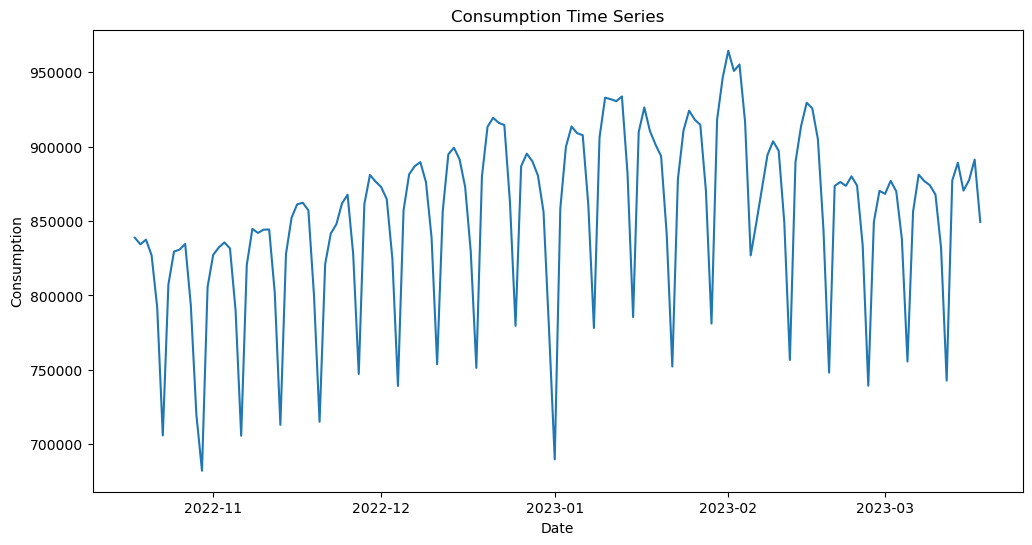

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['consumption'])
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.title('Consumption Time Series')
plt.show()

In [7]:
from statsmodels.tsa.stattools import kpss, adfuller
def adf(series):
    conclusion = list() ; pvalues=list()
    ALPHA = 0.05
    p_adf=adfuller(series)[1]
    if p_adf > ALPHA: conclusion='Not stationary' 
    if p_adf <= ALPHA: conclusion='Stationary' 
    print('p(adf)    :',p_adf)
    print('Conclusion:',conclusion)

In [8]:
adf(data['consumption'])

p(adf)    : 0.1769779315324741
Conclusion: Not stationary


In [9]:
adf(np.log(data['consumption']))

p(adf)    : 0.1571383480874433
Conclusion: Not stationary


In [10]:
def obtain_adf_kpss_results(timeseries, max_d = 3):
    results=[]
    for idx in range(max_d):
        adf_result = adfuller(timeseries, autolag='AIC')
        kpss_result = kpss(timeseries, regression='c', nlags="auto")
        timeseries = timeseries.diff().dropna()
        if adf_result[1] <=0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <=0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True            
        stationary = adf_stationary & kpss_stationary            
        results.append((idx,adf_result[1], kpss_result[1],adf_stationary,kpss_stationary, stationary))
    results_df = pd.DataFrame(results, columns=['Diff','ADF P-value','KPSS P-value', 'ADF Stationary','KPSS Stationary','RESULT' ])    
    return results_df

In [11]:
obtain_adf_kpss_results(data['consumption'], max_d = 8)

C:\Users\duruh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\duruh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Diff,ADF P-value,KPSS P-value,ADF Stationary,KPSS Stationary,RESULT
0,0,1.769779e-01,0.010000,False,False,False
1,1,6.467653e-04,0.100000,True,True,True
2,2,1.367735e-12,0.041667,True,False,False
3,3,5.127449e-10,0.058149,True,True,True
4,4,5.841520e-11,0.041667,True,False,False
5,5,1.378191e-15,0.041667,True,False,False
6,6,5.637003e-19,0.041667,True,False,False
7,7,4.963904e-24,0.064244,True,True,True


In [12]:
obtain_adf_kpss_results(np.log(data['consumption']), max_d = 5)

C:\Users\duruh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(
C:\Users\duruh\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Diff,ADF P-value,KPSS P-value,ADF Stationary,KPSS Stationary,RESULT
0,0,1.571383e-01,0.010000,False,False,False
1,1,9.454553e-04,0.100000,True,True,True
2,2,4.628780e-09,0.041667,True,False,False
3,3,7.937626e-10,0.044211,True,False,False
4,4,2.226764e-11,0.041667,True,False,False


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

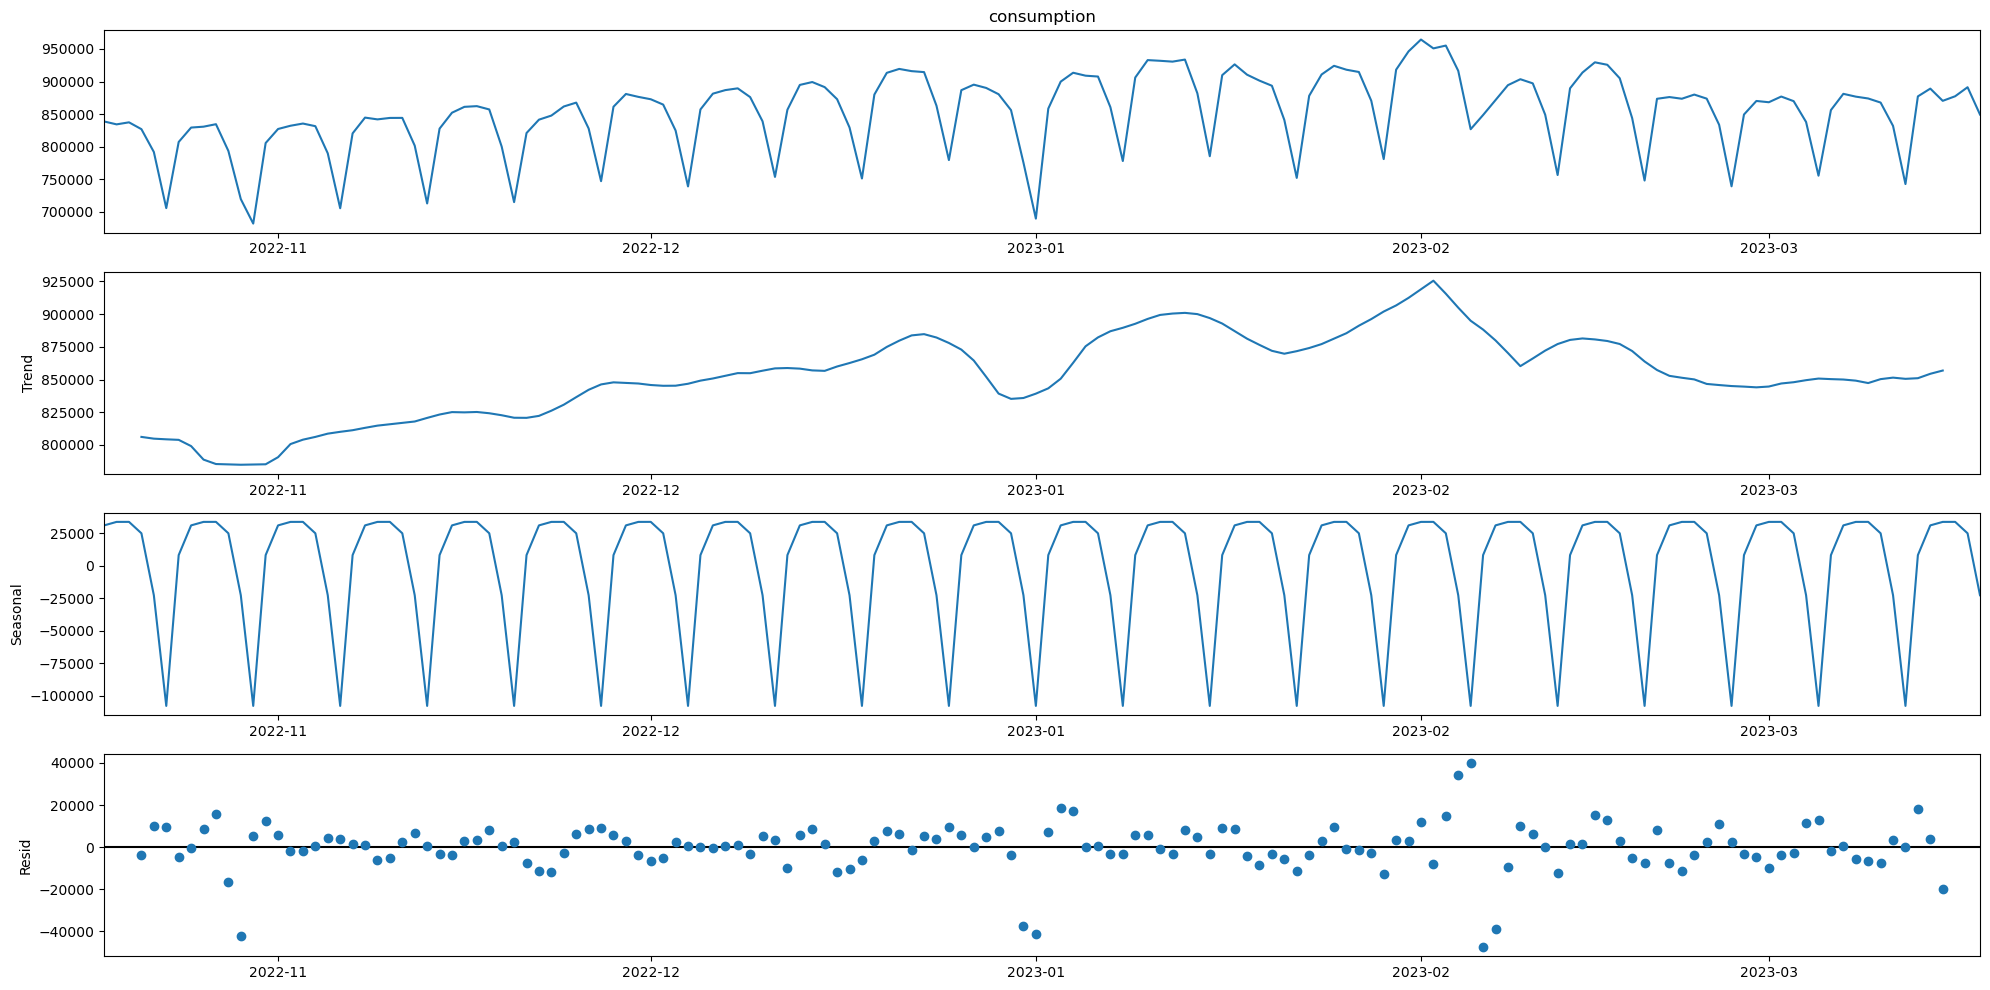

In [14]:

plt.rcParams["figure.figsize"] = (20, 10)

result = seasonal_decompose(data['consumption'], model='additive')

result.plot()
plt.show()

<AxesSubplot:xlabel='date'>

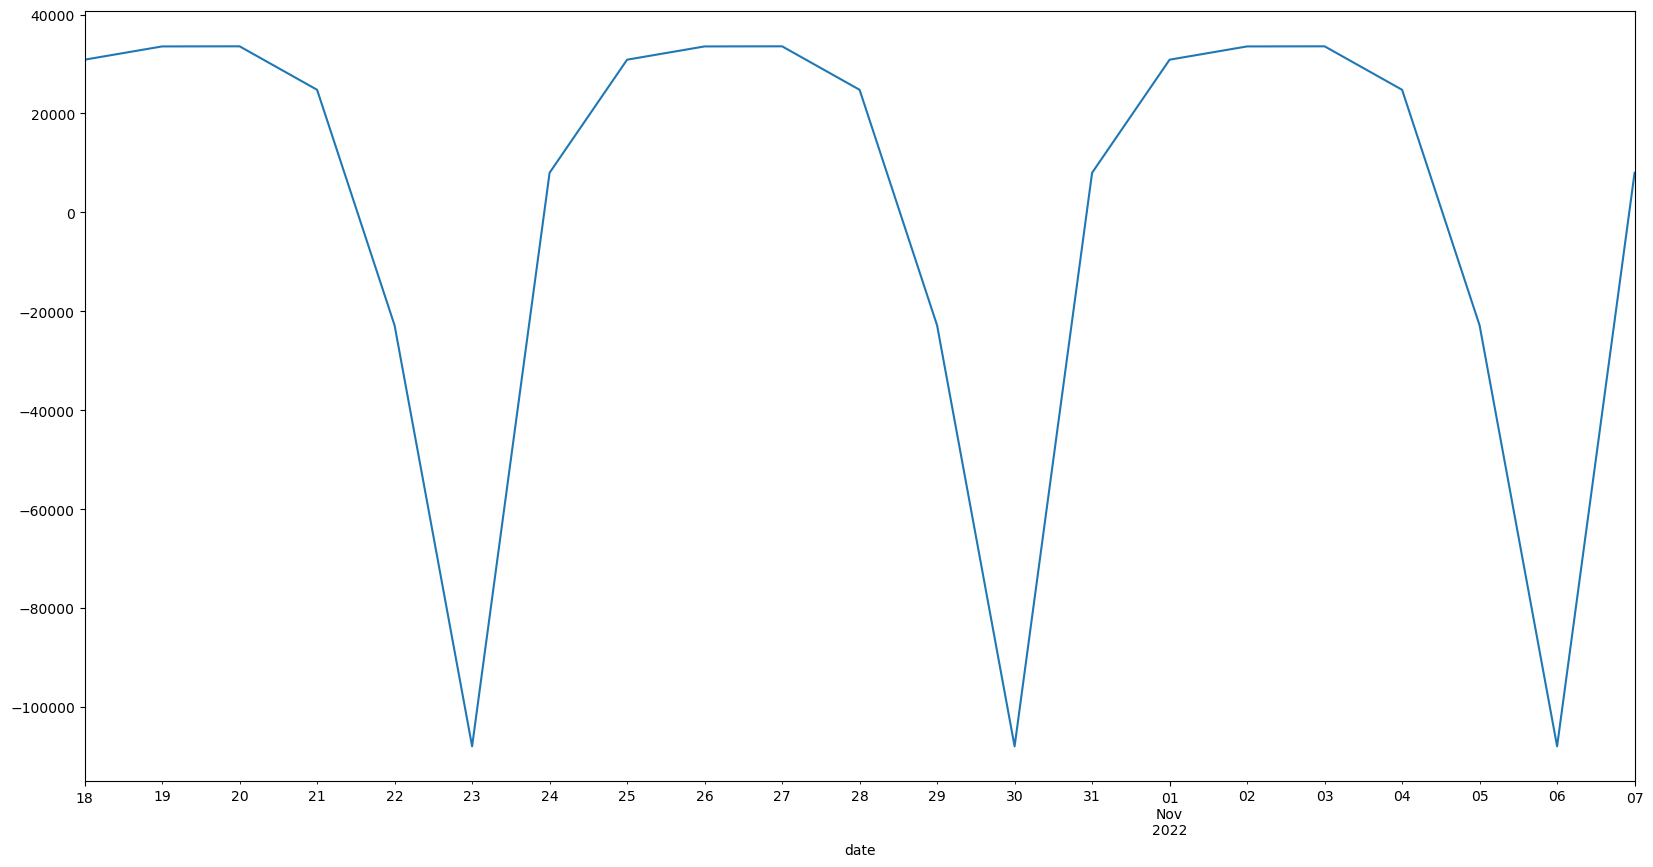

In [15]:
result.seasonal[:21].plot()

It appears there is weekly seasonality.

In [16]:
weekday_data = data[data['weekend'] == 'Weekday']
weekend_data = data[data['weekend'] == 'Weekend']
holiday_data = data[data['holiday'] != 'No holiday']
non_holiday_data = data[data['holiday'] == 'No holiday']

print("Weekday mean consumption      :", weekday_data['consumption'].mean())
print("Weekday standard deviation    :", weekday_data['consumption'].std())
print("\nWeekend mean consumption      :", weekend_data['consumption'].mean())
print("Weekend standard deviation    :", weekend_data['consumption'].std())
print("\nHoliday mean consumption      :", holiday_data['consumption'].mean())
print("Holiday standard deviation    :", holiday_data['consumption'].std())
print("\nNon-holiday mean consumption  :", non_holiday_data['consumption'].mean())
print("Non-holiday standard deviation:", non_holiday_data['consumption'].std())

Weekday mean consumption      : 878707.3364220185
Weekday standard deviation    : 34908.36686221844

Weekend mean consumption      : 789081.4023255813
Weekend standard deviation    : 57394.13431950336

Holiday mean consumption      : 704798.93
Holiday standard deviation    : 21168.471860618556

Non-holiday mean consumption  : 855333.3474000002
Non-holiday standard deviation: 56311.85161530703


In [17]:
from IPython.display import display

In [18]:
grouped_by_day = data.groupby('day')['consumption'].agg(['mean', 'std'])
grouped_by_day

grouped_by_weekend = data.groupby('weekend')['consumption'].agg(['mean', 'std'])
grouped_by_weekend

grouped_by_holiday = data.groupby('holiday')['consumption'].agg(['mean', 'std'])
display(grouped_by_day, grouped_by_weekend, grouped_by_holiday)


,mean,std
day,,
Friday,878008.145909,36885.889690
Monday,861457.359524,32303.857297
Saturday,830960.101818,40781.053786
Sunday,745208.479048,34943.523342
Thursday,885214.276818,32199.105017
Tuesday,882671.452727,33832.828858
Wednesday,885401.357273,36405.498315


,mean,std
weekend,,
Weekday,878707.336422,34908.366862
Weekend,789081.402326,57394.134320


,mean,std
holiday,,
New Year's Day,689830.5600,NaN
No holiday,855333.3474,56311.851615
Republic Day,719767.3000,NaN


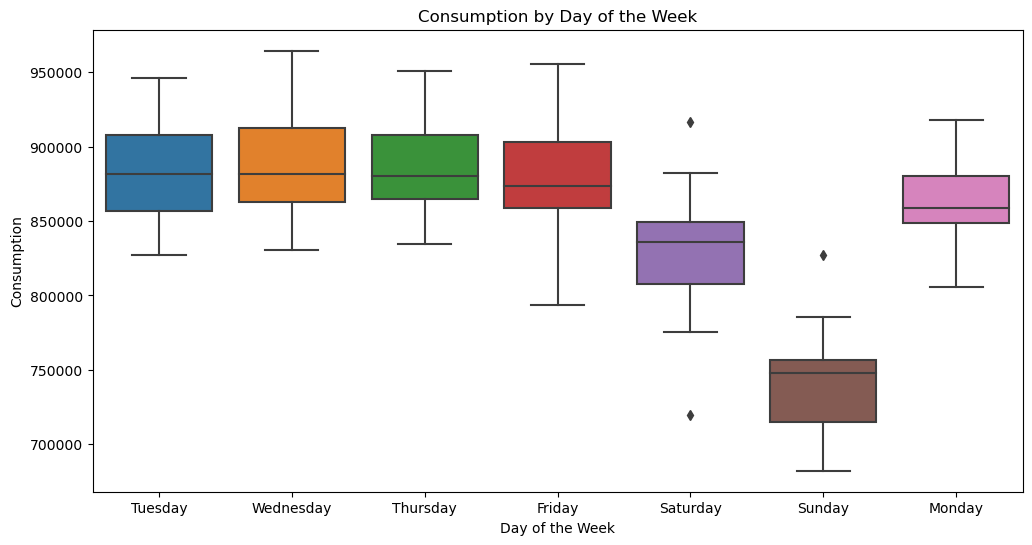

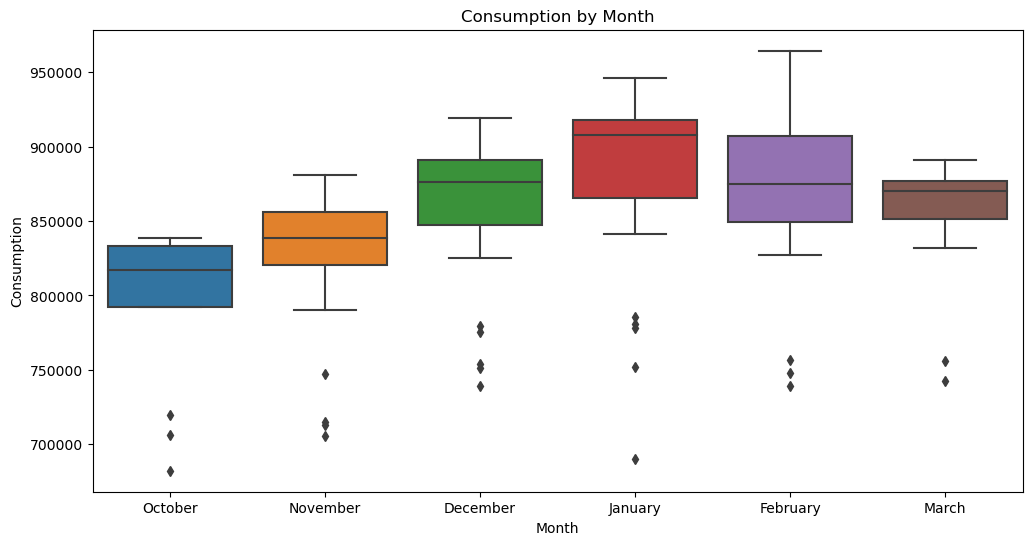

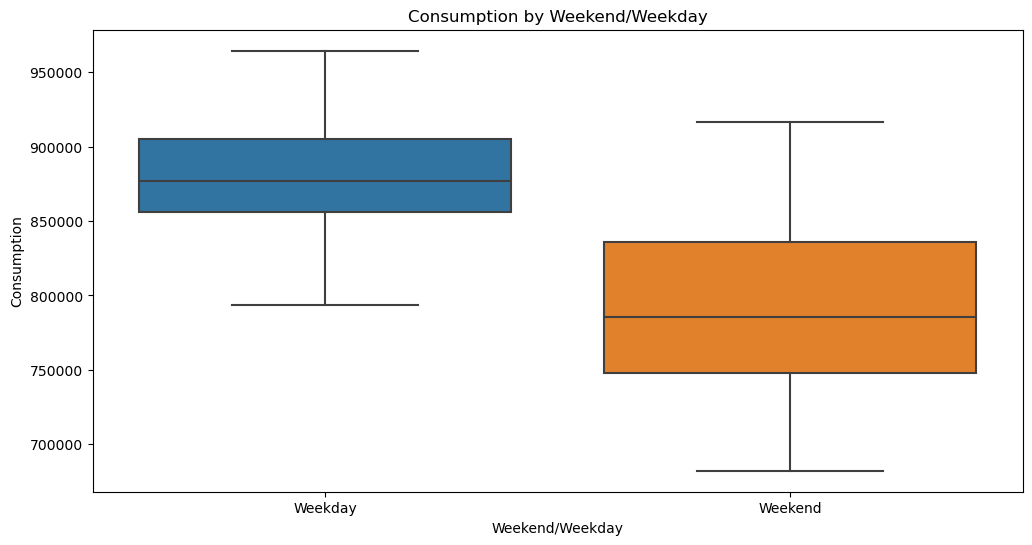

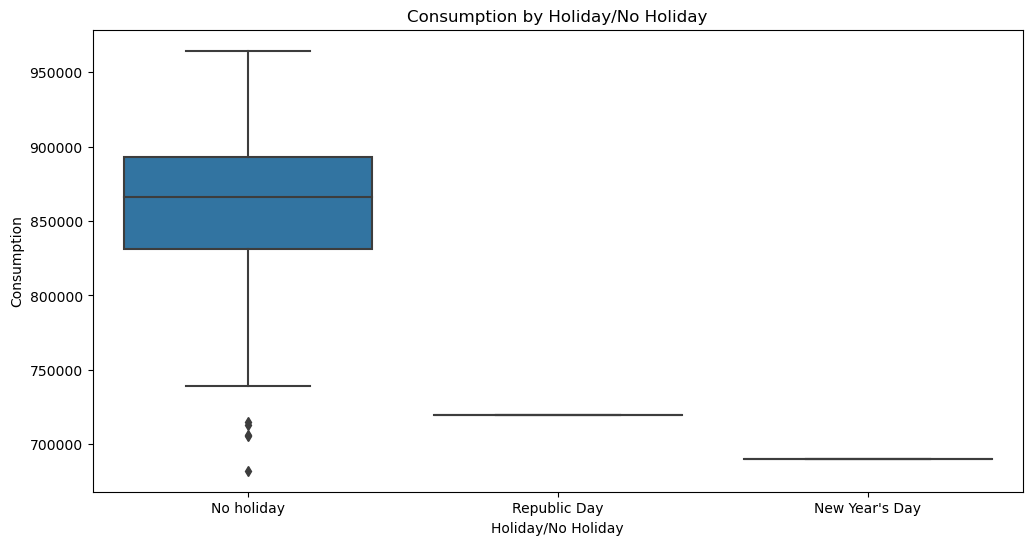

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['day'], y=data['consumption'])
plt.xlabel('Day of the Week')
plt.ylabel('Consumption')
plt.title('Consumption by Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['month'], y=data['consumption'])
plt.xlabel('Month')
plt.ylabel('Consumption')
plt.title('Consumption by Month')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['weekend'], y=data['consumption'])
plt.xlabel('Weekend/Weekday')
plt.ylabel('Consumption')
plt.title('Consumption by Weekend/Weekday')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=data['holiday'], y=data['consumption'])
plt.xlabel('Holiday/No Holiday')
plt.ylabel('Consumption')
plt.title('Consumption by Holiday/No Holiday')
plt.show()



In [20]:
data['holiday'].value_counts()

No holiday        150
Republic Day        1
New Year's Day      1
Name: holiday, dtype: int64

There are only two holidays in the dataset. I will keep this column because consumption seems to be far less than average in holidays bu I am not going to separate New Year's Day from the Republic day.

In [21]:
df = data.copy()
df['is_saturday'] = np.where(df['day'] == 'Saturday', 1, 0)
df['is_sunday'] = np.where(df['day'] == 'Sunday', 1, 0)
df['day'] = df.index.weekday
df['weekend'] = df['weekend'].map({'Weekday':0, 'Weekend':1})
df['holiday'] = np.where(df['holiday'] == 'No holiday', 0, 1)
df.head(10)

,consumption,month,day,weekend,holiday,is_saturday,is_sunday
date,,,,,,,
2022-10-18,838818.13,October,1,0,0,0,0
2022-10-19,834358.85,October,2,0,0,0,0
2022-10-20,837491.36,October,3,0,0,0,0
2022-10-21,826990.28,October,4,0,0,0,0
2022-10-22,792007.99,October,5,1,0,1,0
2022-10-23,705914.86,October,6,1,0,0,1
2022-10-24,807354.75,October,0,0,0,0,0
2022-10-25,829470.90,October,1,0,0,0,0
2022-10-26,830819.51,October,2,0,0,0,0


In [22]:
def cycle_encode(data, cols):
    for col in cols:
        data[col + '_sin'] = np.sin(2 * np.pi * data[col]/data[col].max())
        data[col + '_cos'] = np.cos(2 * np.pi * data[col]/data[col].max())
    return data

In [23]:
cycle_encode(df, ['day'])
dummies = pd.get_dummies(df['month'], prefix = 'month')
df = pd.concat([df, dummies], axis=1)
df.drop(['month', 'day', 'weekend'], axis = 1, inplace = True)
df.head(10)

,consumption,holiday,is_saturday,is_sunday,day_sin,day_cos,month_December,month_February,month_January,month_March,month_November,month_October
date,,,,,,,,,,,,
2022-10-18,838818.13,0,0,0,8.660254e-01,0.5,0,0,0,0,0,1
2022-10-19,834358.85,0,0,0,8.660254e-01,-0.5,0,0,0,0,0,1
2022-10-20,837491.36,0,0,0,1.224647e-16,-1.0,0,0,0,0,0,1
2022-10-21,826990.28,0,0,0,-8.660254e-01,-0.5,0,0,0,0,0,1
2022-10-22,792007.99,0,1,0,-8.660254e-01,0.5,0,0,0,0,0,1
2022-10-23,705914.86,0,0,1,-2.449294e-16,1.0,0,0,0,0,0,1
2022-10-24,807354.75,0,0,0,0.000000e+00,1.0,0,0,0,0,0,1
2022-10-25,829470.90,0,0,0,8.660254e-01,0.5,0,0,0,0,0,1
2022-10-26,830819.51,0,0,0,8.660254e-01,-0.5,0,0,0,0,0,1


In [24]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [25]:
train = df.iloc[:-7]
test = df.iloc[-7:]

In [26]:
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [27]:
# Function to calculate Root Mean Squared Error (RMSE)
def calculate_rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1. Simple Exponential Smoothing (SES)
model1 = SimpleExpSmoothing(train['consumption']).fit()
pred1 = model1.forecast(7)
rmse1 = calculate_rmse(test['consumption'], pred1)

# 2. Holt's Linear Trend Model
model2 = Holt(train['consumption']).fit()
pred2 = model2.forecast(7)
rmse2 = calculate_rmse(test['consumption'], pred2)

# 3. Holt-Winters Seasonal Model
model3 = ExponentialSmoothing(train['consumption'], seasonal='add', seasonal_periods=7).fit()
pred3 = model3.forecast(7)
rmse3 = calculate_rmse(test['consumption'], pred3)

# 4. SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model4 = SARIMAX(train['consumption'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)).fit()
pred4 = model4.forecast(7)
rmse4 = calculate_rmse(test['consumption'], pred4)

# 5. SARIMA (Seasonal AutoRegressive Integrated Moving Average)
model5 = ARIMA(train['consumption'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
pred5 = model5.forecast(7)
rmse5 = calculate_rmse(test['consumption'], pred5)

# 6. Prophet
train_prophet = train.reset_index().rename(columns={'date': 'ds', 'consumption': 'y'})
test_prophet = test.reset_index().rename(columns={'date': 'ds', 'consumption': 'y'})
model6 = Prophet().fit(train_prophet)
pred6 = model6.predict(test_prophet[['ds']])
rmse6 = calculate_rmse(test_prophet['y'], pred6['yhat'])

# Compare models
rmse_results = pd.DataFrame({'Model': ['SES', 'Holt', 'Holt-Winters', 'SARIMA', 'ARIMA', 'Prophet'],
                             'RMSE': [rmse1, rmse2, rmse3, rmse4, rmse5, rmse6]})
print(rmse_results)


22:12:51 - cmdstanpy - INFO - Chain [1] start processing
22:12:51 - cmdstanpy - INFO - Chain [1] done processing


          Model          RMSE
0           SES  48314.130526
1          Holt  52176.660175
2  Holt-Winters  13556.128253
3        SARIMA  16096.007612
4         ARIMA  15914.535686
5       Prophet  28101.808297


### Holt-Winters Methods

**Exponential Smoothing - Additive**

In [28]:
HW = pd.DataFrame(df.consumption)

<AxesSubplot:xlabel='date'>

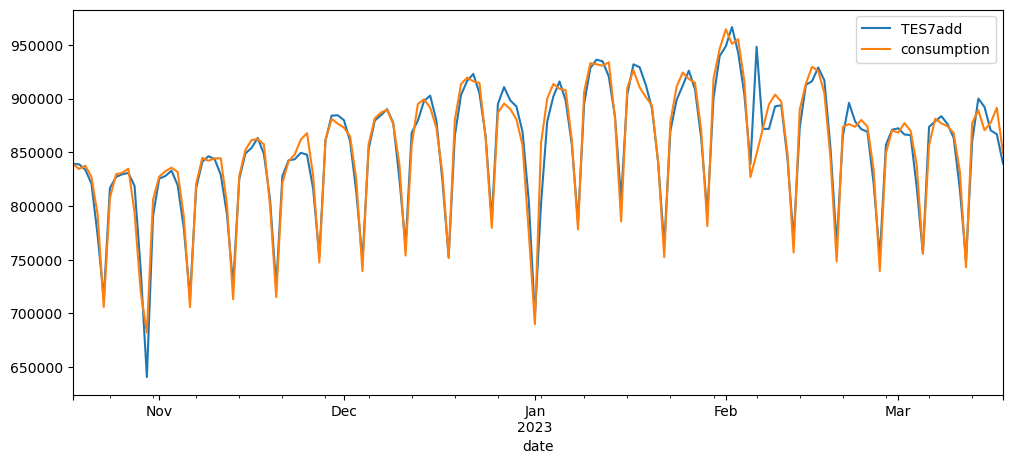

In [29]:
HW['TES7add'] = ExponentialSmoothing(HW.consumption, trend='add',seasonal='add',seasonal_periods=7).fit().fittedvalues
HW[['TES7add','consumption']].plot(figsize = (12,5))

In [30]:
calculate_rmse(HW.TES7add, HW.consumption)

14496.029344612407

**Exponential Smoothing - Multiplicative**

<AxesSubplot:xlabel='date'>

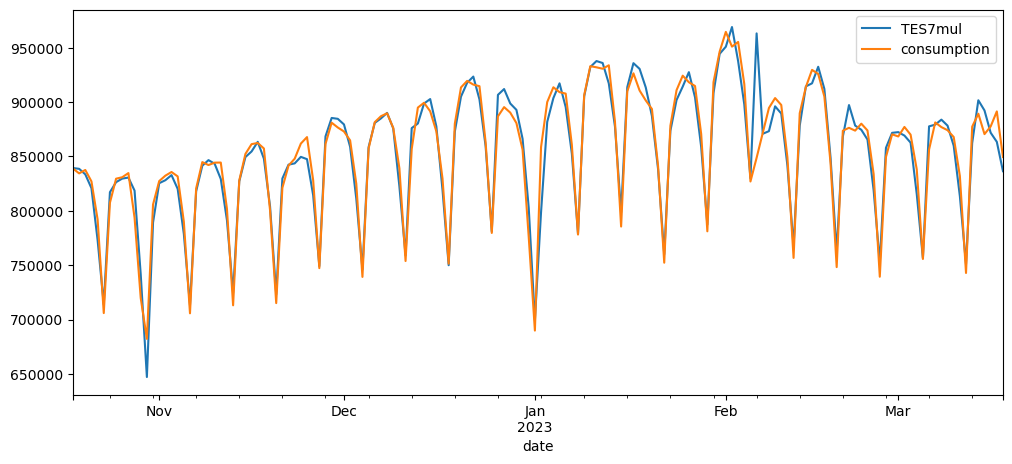

In [31]:
HW['TES7mul'] = ExponentialSmoothing(HW.consumption, trend='mul',seasonal='mul',seasonal_periods=7).fit().fittedvalues
HW[['TES7mul','consumption']].plot(figsize = (12,5))

In [32]:
calculate_rmse(HW.TES7mul, HW.consumption)

15233.043807447302

**Exponential Smoothing - trend='add',seasonal='mul'**

<AxesSubplot:xlabel='date'>

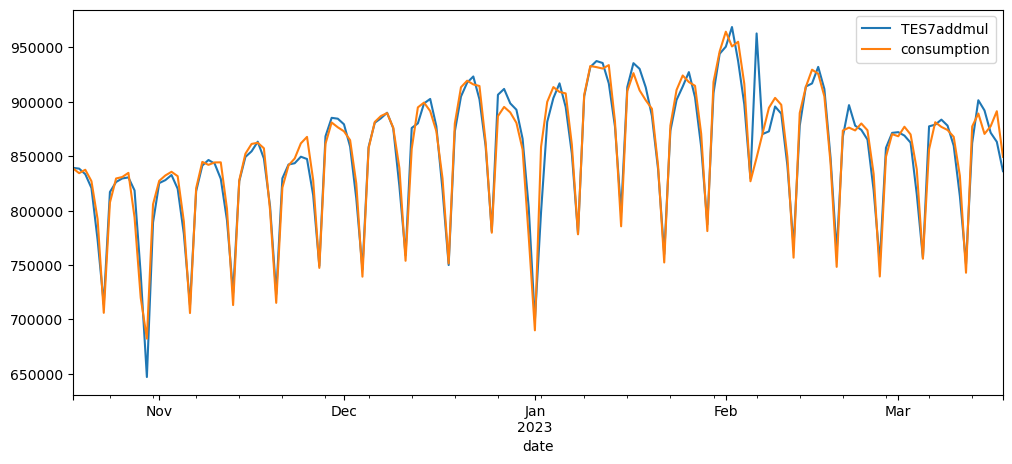

In [33]:
HW['TES7addmul'] = ExponentialSmoothing(HW.consumption, trend='add',seasonal='mul',seasonal_periods=7).fit().fittedvalues
HW[['TES7addmul','consumption']].plot(figsize = (12,5))

In [34]:
calculate_rmse(HW.TES7addmul, HW.consumption)

15241.347325240768

**Exponential Smoothing - trend='mul',seasonal='add'**

<AxesSubplot:xlabel='date'>

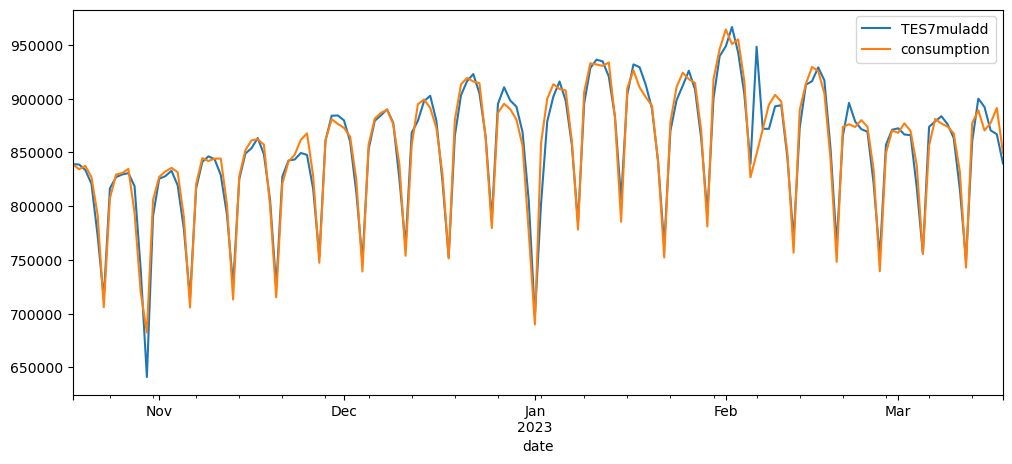

In [35]:
HW['TES7muladd'] = ExponentialSmoothing(HW.consumption, trend='mul',seasonal='add',seasonal_periods=7).fit().fittedvalues
HW[['TES7muladd','consumption']].plot(figsize = (12,5))

In [36]:
calculate_rmse(HW.TES7muladd, HW.consumption) #This is the HW method with the lowest rmse.

14487.375163962583

In [37]:
modelHW = ExponentialSmoothing(train['consumption'], trend='mul',seasonal='add',seasonal_periods=7).fit()
predHW = modelHW.forecast(7)
rmseHW = calculate_rmse(test['consumption'], predHW)

In [38]:
rmse_results = pd.DataFrame(columns=['Model', 'RMSE'])
rmse_results = rmse_results.append({'Model':'HW', 'RMSE':rmseHW}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596


## ARIMA

In [39]:
from pmdarima import auto_arima

In [40]:
best_model = auto_arima(train['consumption'],
                        d = 0, #I wil compare the AIC using only seasonal differencing
                        seasonal=True,
                        m=7,  # Weekly seasonality
                        stepwise=True,
                        trace=True,
                        suppress_warnings=True,
                        error_action='ignore')
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=3306.717, Time=0.60 sec
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=3258.814, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=3280.462, Time=0.10 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=3234.293, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=3257.625, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=3253.760, Time=0.04 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=3234.454, Time=0.14 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=3233.083, Time=0.18 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=3233.336, Time=0.31 sec
 ARIMA(0,0,0)(0,1,2)[7] intercept   : AIC=3252.534, Time=0.11 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=3289.613, Time=0.27 sec
 ARIMA(0,0,2)(0,1,2)[7] intercept   : AIC=3251.557, Time=0.21 sec
 ARIMA(1,0,0)(0,1,2)[7] intercept   : AIC=3278.216, Time=0.21 sec
 ARIMA(1,0,2)(0,1,2)[7] intercept   : AIC=3284.925, Time=0.49 sec
 ARIMA(0,0,1)(0,1,2)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  145
Model:             SARIMAX(0, 0, 1)x(1, 1, [1, 2], 7)   Log Likelihood               -1609.755
Date:                                Wed, 22 Mar 2023   AIC                           3229.511
Time:                                        22:12:59   BIC                           3244.147
Sample:                                    10-18-2022   HQIC                          3235.458
                                         - 03-11-2023                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1818      0.015     11.972      0.000       0.152       0.212
ar.S.L7        0.7929      0.139      5.715      0.000       0.521       1.065
ma.S.L7       -0.8576      0.140     -6.140      0.000      -1.131      -0.584
ma.S.L14       0.0745      0.015      4.957      0.000       0.045       0.104
sigma2       6.79e+08   2.09e-10   3.24e+18      0.000    6.79e+08    6.79e+08
===================================================================================
Ljung-Box (L1) (Q):                  50.78   Jarque-Bera (JB):                 8.58
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.78   Skew:                            -0.46
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+34. Standard errors may be unstable.
"""

In [41]:
best_model = auto_arima(train['consumption'],
                        d = 1, #Previously I have seen that first difference maks the data stationay
                        seasonal=True,
                        m=7,  # Weekly seasonality
                        stepwise=True,
                        trace=True,
                        suppress_warnings=True,
                        error_action='ignore')
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[7]             : AIC=3101.882, Time=0.53 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=3111.162, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=3111.989, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=3111.739, Time=0.14 sec
 ARIMA(2,1,2)(0,1,1)[7]             : AIC=3107.409, Time=0.55 sec
 ARIMA(2,1,2)(1,1,0)[7]             : AIC=3107.758, Time=0.36 sec
 ARIMA(2,1,2)(2,1,1)[7]             : AIC=3103.725, Time=0.73 sec
 ARIMA(2,1,2)(1,1,2)[7]             : AIC=3103.721, Time=0.76 sec
 ARIMA(2,1,2)(0,1,0)[7]             : AIC=3110.714, Time=0.16 sec
 ARIMA(2,1,2)(0,1,2)[7]             : AIC=3107.490, Time=0.66 sec
 ARIMA(2,1,2)(2,1,0)[7]             : AIC=3108.140, Time=0.52 sec
 ARIMA(2,1,2)(2,1,2)[7]             : AIC=3105.634, Time=0.85 sec
 ARIMA(1,1,2)(1,1,1)[7]             : AIC=3108.489, Time=0.34 sec
 ARIMA(2,1,1)(1,1,1)[7]             : AIC=3108.315, Time=0.24 sec
 ARIMA(3,1,2)(1,1,1)[7]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  145
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 7)   Log Likelihood               -1543.941
Date:                             Wed, 22 Mar 2023   AIC                           3101.882
Time:                                     22:13:09   BIC                           3122.322
Sample:                                 10-18-2022   HQIC                          3110.188
                                      - 03-11-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0585      0.148      0.395      0.693      -0.232       0.349
ar.L2         -0.8758      0.104     -8.411      0.000      -1.080      -0.672
ma.L1         -0.0630      0.170     -0.371      0.710      -0.396       0.270
ma.L2          0.8458      0.117      7.205      0.000       0.616       1.076
ar.S.L7        0.7078      0.060     11.754      0.000       0.590       0.826
ma.S.L7       -0.8782      0.067    -13.013      0.000      -1.010      -0.746
sigma2      3.737e+08   1.83e-10   2.04e+18      0.000    3.74e+08    3.74e+08
===================================================================================
Ljung-Box (L1) (Q):                   2.39   Jarque-Bera (JB):               817.34
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               2.66   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.85e+34. Standard errors may be unstable.
"""

Second one performs better.

In [42]:
modelARIMA    = ARIMA(train['consumption'], order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predARIMA    = modelARIMA.forecast(7)
rmseARIMA    = calculate_rmse(test['consumption'], predARIMA)
rmse_results = rmse_results.append({'Model':'ARIMA', 'RMSE':rmseARIMA}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686


In [43]:
df.columns

Index(['consumption', 'holiday', 'is_saturday', 'is_sunday', 'day_sin',
       'day_cos', 'month_December', 'month_February', 'month_January',
       'month_March', 'month_November', 'month_October'],
      dtype='object')

Now I will tyr to use the  exogenous variables I have created earlier.

In [44]:
exog_train = train[['holiday', 'is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_December', 'month_February', 'month_January','month_March', 'month_November', 'month_October']]
exog_test = test[['holiday', 'is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_December', 'month_February', 'month_January','month_March', 'month_November', 'month_October']]

modelSARIMAX = SARIMAX(train['consumption'], exog=exog_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predSARIMAX = modelSARIMAX.forecast(steps=7, exog=exog_test)
rmseSARIMAX = calculate_rmse(test['consumption'], predSARIMAX)
rmse_results = rmse_results.append({'Model':'SARIMAX', 'RMSE':rmseSARIMAX}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693


I will try different combinations of exogenous variables

In [45]:
exog_train = train[['is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_December', 'month_February', 'month_January','month_March', 'month_November', 'month_October']]
exog_test = test[['is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_December', 'month_February', 'month_January','month_March', 'month_November', 'month_October']]

modelSARIMAX_NoHoliday = SARIMAX(train['consumption'], exog=exog_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predSARIMAX_NoHoliday = modelSARIMAX_NoHoliday.forecast(steps=7, exog=exog_test)
rmseSARIMAX_NoHoliday = calculate_rmse(test['consumption'], predSARIMAX_NoHoliday)
rmse_results = rmse_results.append({'Model':'SARIMAX_NoHoliday', 'RMSE':rmseSARIMAX_NoHoliday}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393


In [46]:
exog_train = train[['is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_January']]
exog_test = test[['is_saturday', 'is_sunday', 'day_sin','day_cos', 'month_January']]

modelSARIMAX_NoHolidayAndMonths = SARIMAX(train['consumption'], exog=exog_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predSARIMAX_NoHolidayAndMonths = modelSARIMAX_NoHolidayAndMonths.forecast(steps=7, exog=exog_test)
rmseSARIMAX_NoHolidayAndMonths = calculate_rmse(test['consumption'], predSARIMAX_NoHolidayAndMonths)
rmse_results = rmse_results.append({'Model':'SARIMAX_NoHolidayAndMonths', 'RMSE':rmseSARIMAX_NoHolidayAndMonths}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393
4,SARIMAX_NoHolidayAndMonths,15913.195148


In [47]:
exog_train = train[['is_sunday', 'day_sin','day_cos', 'month_January']]
exog_test = test[['is_sunday', 'day_sin','day_cos', 'month_January']]

modelSARIMAX_OnlyDays = SARIMAX(train['consumption'], exog=exog_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predSARIMAX_OnlyDays = modelSARIMAX_OnlyDays.forecast(steps=7, exog=exog_test)
rmseSARIMAX_OnlyDays = calculate_rmse(test['consumption'], predSARIMAX_OnlyDays)
rmse_results = rmse_results.append({'Model':'SARIMAX_OnlyDays', 'RMSE':rmseSARIMAX_OnlyDays}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393
4,SARIMAX_NoHolidayAndMonths,15913.195148
5,SARIMAX_OnlyDays,15913.194926


In [48]:
exog_train = train[['is_sunday', 'month_January']]
exog_test = test[['is_sunday', 'month_January']]

modelSARIMAX_OnlyEngined = SARIMAX(train['consumption'], exog=exog_train, order=(2, 1, 2), seasonal_order=(1, 1, 1, 7)).fit()
predSARIMAX_OnlyEngined = modelSARIMAX_OnlyEngined.forecast(steps=7, exog=exog_test)
rmseSARIMAX_OnlyDays = calculate_rmse(test['consumption'], predSARIMAX_OnlyEngined)
rmse_results = rmse_results.append({'Model':'SARIMAX_OnlyEngined', 'RMSE':rmseSARIMAX_OnlyDays}, ignore_index=True)
rmse_results

,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393
4,SARIMAX_NoHolidayAndMonths,15913.195148
5,SARIMAX_OnlyDays,15913.194926
6,SARIMAX_OnlyEngined,15913.194262


In [49]:
train_prophet = train.reset_index().rename(columns={'date': 'ds', 'consumption': 'y'})
test_prophet = test.reset_index().rename(columns={'date': 'ds', 'consumption': 'y'})

modelProphet = Prophet().fit(train_prophet)
predProphet = modelProphet.predict(test_prophet[['ds']])
rmseProphet = calculate_rmse(test_prophet['y'], predProphet['yhat'])

rmse_results = rmse_results.append({'Model':'Prophet', 'RMSE':rmseProphet}, ignore_index=True)
rmse_results

22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing


,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393
4,SARIMAX_NoHolidayAndMonths,15913.195148
5,SARIMAX_OnlyDays,15913.194926
6,SARIMAX_OnlyEngined,15913.194262
7,Prophet,28101.808297


In [50]:
train_prophet['holiday'] = np.array(train['holiday'])
train_prophet['weekend'] = np.where(((train['is_saturday'] ==1) | (train['is_sunday'] == 1)),1,0)

test_prophet['holiday'] = np.array(test['holiday'])
test_prophet['weekend'] = np.where(((test['is_saturday'] ==1) | (test['is_sunday'] == 1)),1,0)

holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(train_prophet.loc[train_prophet['holiday'] == 1, 'ds']),
  'lower_window': 0,
  'upper_window': 0,
})

weekends = pd.DataFrame({
  'holiday': 'weekend',
  'ds': pd.concat([
    pd.to_datetime(train_prophet.loc[train_prophet['is_saturday'] == 1, 'ds']),
    pd.to_datetime(train_prophet.loc[train_prophet['is_sunday'] == 1, 'ds'])
  ]),
  'lower_window': 0,
  'upper_window': 0,
})

holidays_weekends = pd.concat((holidays, weekends))

modelProphet2 = Prophet()
modelProphet2.add_seasonality(name='weekend', period=7, fourier_order=3, condition_name='weekend')
modelProphet2.add_seasonality(name='holiday', period=365.25, fourier_order=10, condition_name='holiday')

modelProphet2.fit(train_prophet)
predProphet2 = modelProphet2.predict(test_prophet)
rmseProphet2 = calculate_rmse(test_prophet['y'], predProphet2['yhat'])

rmse_results = rmse_results.append({'Model':'Prophet2', 'RMSE':rmseProphet}, ignore_index=True)
rmse_results

22:13:13 - cmdstanpy - INFO - Chain [1] start processing
22:13:13 - cmdstanpy - INFO - Chain [1] done processing


,Model,RMSE
0,HW,13487.126596
1,ARIMA,15914.535686
2,SARIMAX,16461.164693
3,SARIMAX_NoHoliday,16042.362393
4,SARIMAX_NoHolidayAndMonths,15913.195148
5,SARIMAX_OnlyDays,15913.194926
6,SARIMAX_OnlyEngined,15913.194262
7,Prophet,28101.808297
8,Prophet2,28101.808297


Holt Winters seem to have the smallest RMSE. Let's design a time series cross-validation study to compare models.

In [65]:
df_fb = pd.DataFrame()
df_fb['ds'] = np.array(df.index)
df_fb['y'] = np.array(df.consumption)

df_models = df[["consumption"]]

n_train_start = 117
n_forecast = 7

empty_length = 152 - n_train_start

sarima_forecasts0 = np.empty(empty_length)
sarima_forecasts1 = np.empty(empty_length)
hw_forecasts0 = np.empty(empty_length)
hw_forecasts1 = np.empty(empty_length)
hw_forecasts2 = np.empty(empty_length)
hw_forecasts3 = np.empty(empty_length)
hw_forecasts4 = np.empty(empty_length)
hw_forecasts5 = np.empty(empty_length)
proph_forecasts0 = np.empty(empty_length)

for i in range(int(empty_length/n_forecast)):
    
    train_ = df_models[0:(n_train_start+i*n_forecast)]
    train_proph = df_fb[0:(n_train_start+i*n_forecast)]

    print("i = ", i, "--- Model = SARIMA 0")
    sarima_fit0 = SARIMAX(train_,order=(2,1,2),seasonal_order=(1,1,1,7)).fit()
    sarima_forecasts0[(i*n_forecast):((i+1)*n_forecast)] = sarima_fit0.forecast(n_forecast).values

    print("i = ", i, "--- Model = SARIMA 1")   
    sarima_fit1 = auto_arima(train_, trace = False, 
                                seasonal = True, m = 7)
    sarima_forecasts1[(i*n_forecast):((i+1)*n_forecast)] = sarima_fit1.predict(n_periods = n_forecast, 
                                                 X = train_[(n_train_start+i*n_forecast):(n_train_start+(i+1)*n_forecast)], 
                                                 return_conf_int = False).values
    
    print("i = ", i, "--- Model = HW 0")
    hw_fit0 = ExponentialSmoothing(train_, trend = 'add').fit()
    hw_forecasts0[(i*n_forecast):((i+1)*n_forecast)] = hw_fit0.forecast(n_forecast).values
    
    print("i = ", i, "--- Model = HW 1")
    hw_fit1 = ExponentialSmoothing(train_, trend = 'mul').fit()
    hw_forecasts1[(i*n_forecast):((i+1)*n_forecast)] = hw_fit1.forecast(n_forecast).values
    
    print("i = ", i, "--- Model = HW 2")
    hw_fit2 = ExponentialSmoothing(train_, trend="add",seasonal="add",seasonal_periods=7).fit()
    hw_forecasts2[(i*n_forecast):((i+1)*n_forecast)] = hw_fit2.forecast(n_forecast).values

    print("i = ", i, "--- Model = HW 3")
    hw_fit3 = ExponentialSmoothing(train_,trend="mul",seasonal="mul",seasonal_periods=7).fit()
    hw_forecasts3[(i*n_forecast):((i+1)*n_forecast)] = hw_fit3.forecast(n_forecast).values


    print("i = ", i, "--- Model = Prophet 0")
    m0 = Prophet(n_changepoints = 7, 
            yearly_seasonality = False,
            weekly_seasonality = True, 
            daily_seasonality = False) 
    m0.fit(train_proph)
    
    future0 = m0.make_future_dataframe(periods = n_forecast)
    proph_forecasts0[(i*n_forecast):((i+1)*n_forecast)] = m0.predict(future0)['yhat'].tail(1).values

i =  0 --- Model = SARIMA 0
i =  0 --- Model = SARIMA 1
i =  0 --- Model = HW 0
i =  0 --- Model = HW 1
i =  0 --- Model = HW 2
i =  0 --- Model = HW 3


22:24:30 - cmdstanpy - INFO - Chain [1] start processing
22:24:30 - cmdstanpy - INFO - Chain [1] done processing


i =  0 --- Model = Prophet 0
i =  1 --- Model = SARIMA 0
i =  1 --- Model = SARIMA 1
i =  1 --- Model = HW 0
i =  1 --- Model = HW 1
i =  1 --- Model = HW 2
i =  1 --- Model = HW 3


22:24:34 - cmdstanpy - INFO - Chain [1] start processing
22:24:34 - cmdstanpy - INFO - Chain [1] done processing


i =  1 --- Model = Prophet 0
i =  2 --- Model = SARIMA 0
i =  2 --- Model = SARIMA 1
i =  2 --- Model = HW 0
i =  2 --- Model = HW 1
i =  2 --- Model = HW 2
i =  2 --- Model = HW 3


22:24:42 - cmdstanpy - INFO - Chain [1] start processing
22:24:42 - cmdstanpy - INFO - Chain [1] done processing


i =  2 --- Model = Prophet 0
i =  3 --- Model = SARIMA 0
i =  3 --- Model = SARIMA 1
i =  3 --- Model = HW 0
i =  3 --- Model = HW 1
i =  3 --- Model = HW 2
i =  3 --- Model = HW 3


22:24:49 - cmdstanpy - INFO - Chain [1] start processing
22:24:49 - cmdstanpy - INFO - Chain [1] done processing


i =  3 --- Model = Prophet 0
i =  4 --- Model = SARIMA 0
i =  4 --- Model = SARIMA 1
i =  4 --- Model = HW 0
i =  4 --- Model = HW 1
i =  4 --- Model = HW 2
i =  4 --- Model = HW 3


22:24:56 - cmdstanpy - INFO - Chain [1] start processing
22:24:56 - cmdstanpy - INFO - Chain [1] done processing


i =  4 --- Model = Prophet 0


In [66]:
display(sarima_forecasts0,sarima_forecasts1,hw_forecasts0, hw_forecasts1,hw_forecasts2,hw_forecasts3,proph_forecasts0)

array([762671.17024622, 795119.38100379, 816227.85498977, 836591.96518456,
       846331.88910727, 841311.41401394, 791516.89564062, 750670.35505608,
       880301.67582917, 908982.36408672, 922511.81310728, 916716.58602413,
       899037.52028374, 842300.49083566, 738550.28834281, 859941.0547715 ,
       868541.4808102 , 869199.49191332, 873209.41989394, 865482.15270536,
       824694.21613348, 746455.07970757, 855775.17604095, 876959.23401968,
       877298.84710445, 885429.65764265, 877584.81098756, 842155.03198735,
       749943.36641627, 852680.18521491, 878606.92241231, 875444.49798004,
       873329.76949428, 867300.07036093, 829822.42840157])

array([792545.93231164, 865673.43353641, 894430.86351911, 899013.59936005,
       897269.61036585, 893435.48836885, 861330.44720574, 763361.33841068,
       889504.83226214, 913480.05276401, 929757.79470738, 927177.92814103,
       907297.55228708, 846934.62961341, 747661.42907483, 875468.04903425,
       879307.07060008, 878069.36269068, 883775.44234597, 876237.68086387,
       834486.71196975, 740396.60808777, 851119.23836779, 870233.91046865,
       868005.2134841 , 876790.14735242, 869688.26960831, 837329.88089113,
       753139.5526029 , 855383.48929149, 879851.61759935, 875424.07546746,
       873587.51952762, 867267.55427799, 832110.88301928])

array([897719.6598507 , 897941.60021427, 898163.54057784, 898385.48094141,
       898607.42130498, 898829.36166855, 899051.30203212, 890434.10166947,
       890240.89719853, 890047.69272758, 889854.48825664, 889661.28378569,
       889468.07931475, 889274.8748438 , 868937.4102078 , 867681.44770357,
       866425.48519934, 865169.52269511, 863913.56019088, 862657.59768664,
       861401.63518241, 848862.59510046, 847399.68154926, 845936.76799807,
       844473.85444688, 843010.94089569, 841548.02734449, 840085.1137933 ,
       840871.56073652, 839414.72916104, 837957.89758556, 836501.06601008,
       835044.2344346 , 833587.40285912, 832130.57128364])

array([897869.31580242, 898096.0235734 , 898322.78858703, 898549.61085775,
       898776.49040002, 899003.42722831, 899230.42135708, 890562.15076867,
       890374.76217059, 890187.4130021 , 890000.10325488, 889812.83292064,
       889625.6019911 , 889438.41045795, 869121.51045755, 867891.35169865,
       866662.93411235, 865436.25523421, 864211.31260323, 862988.10376194,
       861766.62625632, 850275.60163497, 848613.6826012 , 846955.0118964 ,
       845299.58317151, 843647.39008987, 841998.42632719, 840352.68557157,
       841457.22929582, 840059.37456296, 838663.84198954, 837270.62771793,
       835879.72789689, 834491.13868158, 833104.85623355])

array([773124.64139604, 886582.34229636, 908626.47519393, 911274.56036934,
       913072.60013988, 900226.62702471, 848642.01491747, 767717.97195812,
       881158.4775117 , 902912.82158528, 905414.99512091, 906917.83886436,
       893861.34397863, 842136.37080222, 752179.99101399, 869629.97381447,
       891469.86434128, 894142.6967082 , 893006.70523279, 882782.89323535,
       830159.51125255, 755634.24984566, 873601.81456757, 896003.58425367,
       898912.22590624, 898588.04870234, 888497.30984367, 836506.98754022,
       749047.16458678, 866363.17592773, 889311.80748027, 891838.44985029,
       891570.38525935, 881600.98346939, 830044.72607706])

array([767629.15672038, 891403.85352403, 915702.74307896, 919147.27338645,
       922032.28695957, 907326.77446863, 851334.64082124, 762785.06555232,
       885521.67817843, 909392.62552612, 912547.30212682, 915141.57485073,
       900282.28953345, 844478.8019872 , 753299.34911457, 874317.79002625,
       897684.81091411, 900600.52817491, 902961.38896411, 888103.13940467,
       832868.28415785, 756512.61998575, 878624.18741712, 902817.97768099,
       906197.73471899, 908560.27856775, 894808.89366858, 839468.02548487,
       750907.74720953, 871904.80932049, 895921.01418263, 899117.41951866,
       901362.50384197, 887671.85340018, 832745.37795671])

array([874448.54090415, 874448.54090415, 874448.54090415, 874448.54090415,
       874448.54090415, 874448.54090415, 874448.54090415, 863396.38758773,
       863396.38758773, 863396.38758773, 863396.38758773, 863396.38758773,
       863396.38758773, 863396.38758773, 826433.46143491, 826433.46143491,
       826433.46143491, 826433.46143491, 826433.46143491, 826433.46143491,
       826433.46143491, 806317.47884732, 806317.47884732, 806317.47884732,
       806317.47884732, 806317.47884732, 806317.47884732, 806317.47884732,
       809516.31800758, 809516.31800758, 809516.31800758, 809516.31800758,
       809516.31800758, 809516.31800758, 809516.31800758])

In [68]:
print("RMSE RESULTS:")
print("----------------------------")
print("Sarima", calculate_rmse(df.consumption[n_train_start:], sarima_forecasts0))
print("AutoSarima", calculate_rmse(df.consumption[n_train_start:], sarima_forecasts1))
print("HW-add", calculate_rmse(df.consumption[n_train_start:], hw_forecasts0))
print("HW-mul", calculate_rmse(df.consumption[n_train_start:], hw_forecasts1))
print("HW-add-add", calculate_rmse(df.consumption[n_train_start:], hw_forecasts2))
print("HW-mul-mul", calculate_rmse(df.consumption[n_train_start:], hw_forecasts3))
print("Prophet", calculate_rmse(df.consumption[n_train_start:], proph_forecasts0))

RMSE RESULTS:
----------------------------
Sarima 37166.78866440858
AutoSarima 21421.302264194277
HW-add 53545.540813970765
HW-mul 53537.79618935072
HW-add-add 16655.370969488078
HW-mul-mul 20412.25411782375
Prophet 56359.05591039064


Holt Winters seems the best.

In [80]:
modelHW = ExponentialSmoothing(df['consumption'], trend='mul', seasonal='add', seasonal_periods=7).fit()

next_day_forecast = modelHW.forecast(1)

print("Next day's consumption forecast:", next_day_forecast[0])

Next day's consumption forecast: 766792.0246394293
